<a href="https://colab.research.google.com/github/Eliascc5/Kinematic-of-Delta-Robot/blob/main/DeltaRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Rotational Delta Robot kinematic analysis (3 DOF).</h1>**


**Inspiration from a commercial robot. Model:ABB FlexPicker IRB 360-1 ***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

All parameters in meters.

In [ ]:
Sb=0.567            #Base equilateral triangle side
Sp=0.076            #Platform equilateral triangle side

L = 0.524            #Upper legs length
l = 1.244            #Lower legs parallelogram length
h = 0.131            #Lower legs parallelogram width

wb=(math.sqrt(3)/6)*Sb            #Planar distance from {0} to near base side
ub=(math.sqrt(3)/3)*Sb            #Planar distance from {0} to a base vertex 
wp=(math.sqrt(3)/6)*Sp            #Planar distance from {P} to near platform side
up=(math.sqrt(3)/3)*Sp            #Planar distance from {P} to a platform vertex

#Convertions constants

DEG_TO_RAD = math.pi/180
RAD_TO_DEF = 180/math.pi


Then the angles theta1, theta2 and theta3 correspond to each arituculation. They serve to solve direct kinematics.


NOTE: Uncomment them if you want to test the model

In [ ]:
#Put it in radians
#theta1 = 45*DEG_TO_RAD
#theta2 = 45*DEG_TO_RAD
#theta3 = 45*DEG_TO_RAD


The fixed base Cartesian reference frame is {B}

In [ ]:
B1=np.array([0,-wb,0])
B2=np.array([(math.sqrt(3)/2)*wb,0.5*wb,0])
B3=np.array([(-math.sqrt(3)/2)*wb,0.5*wb,0])

The platform-fixed U-joint connection points Pi are constant in the base frame {P}

In [ ]:
P1=np.array([0,-up,0])
P2=np.array([Sp/2,wp,0])
P3=np.array([-Sp/2,wp,0])

In [ ]:
a=wb-up
b=Sp/2-(math.sqrt(3)/2)*wb
c=wp-0.5*wb

<b><h2>Inverse Position Kinematics 

In [ ]:
# End effector coordinates

x=0.2
y=0.2
z=-1           #Modify Z within the range [-0.9; -1.6]   
               #At maximum depth the radius (x, y) is 0.2 [m]

cord=np.matrix([[x],[y],[z]])     #Just to test

E1=2*L*(y+a)
F1=2*z*L
G1=pow(x,2)+pow(y,2)+pow(z,2)+pow(a,2)+pow(L,2)+2*y*a-pow(l,2)

E2=-L*(math.sqrt(3)*(x+b)+y+c)
F2=2*z*L
G2=pow(x,2)+pow(y,2)+pow(z,2)+pow(b,2)+pow(c,2)+pow(L,2)+2*(x*b+y*c)-pow(l,2)

E3=L*(math.sqrt(3)*(x-b)-y-c)
F3=2*z*L
G3=pow(x,2)+pow(y,2)+pow(z,2)+pow(b,2)+pow(c,2)+pow(L,2)+2*(-x*b + y*c)-pow(l,2)

Tangent Half-Angle Substiitution. 

In [ ]:
t1_positive=(-F1+math.sqrt(abs(pow(E1,2)+pow(F1,2)-pow(G1,2))))/(G1-E1)
t1_negative=(-F1-math.sqrt(abs(pow(E1,2)+pow(F1,2)-pow(G1,2))))/(G1-E1)

t2_positive= (-F2+math.sqrt(abs(pow(E2,2)+pow(F2,2)-pow(G2,2))))/(G2-E2)
t2_negative=(-F2-math.sqrt(abs(pow(E2,2)+pow(F2,2)-pow(G2,2))))/(G2-E2)

t3_positive=(-F3+math.sqrt(abs(pow(E3,2)+pow(F3,2)-pow(G3,2))))/(G3-E3)
t3_negative=(-F3-math.sqrt(abs(pow(E3,2)+pow(F3,2)-pow(G3,2))))/(G3-E3)


#TO DO:  Analysis of the multiple solutions  
#If you want to test the forward kinematic model, you have to comment these three lines

#theta1_p=2*math.atan(t1_positive)
theta1 = theta1_n=(2*math.atan(t1_negative))

#theta2_p = 2*math.atan(t2_positive)
theta2 = theta2_n=(2*math.atan(t2_negative))

#theta3_p=2*math.atan(t3_positive)
theta3 = theta3_n=(2*math.atan(t3_negative))


In [ ]:
L1=np.array([0,-L*math.cos(theta1),-L*math.sin(theta1)])
L2=np.array([(math.sqrt(3)/2)*L*math.cos(theta2),0.5*L*math.cos(theta2),-L*math.sin(theta2)])
L3=np.array([-(math.sqrt(3)/2)*L*math.cos(theta3),0.5*L*math.cos(theta3),-L*math.sin(theta3)])


A1=np.array([0,-wb-L*math.cos(theta1),-L*math.sin(theta1)])
A2=np.array([(math.sqrt(3)/2)*(wb+L*math.cos(theta2)),0.5*(wb+L*math.cos(theta2)),-L*math.sin(theta2)])
A3=np.array([-(math.sqrt(3)/2)*(wb+L*math.cos(theta3)),0.5*(wb+L*math.cos(theta3)),-L*math.sin(theta3)])

In [ ]:
#print("theta1 positive:",theta1_p * RAD_TO_DEF)
print("theta1 negative:",theta1_n * RAD_TO_DEF)     #kinked out solution
print("--------------")
#print("theta2 positive:",theta2_p * RAD_TO_DEF)
print("theta2 negative:",theta2_n * RAD_TO_DEF)     #kinked out solution
print("--------------")
#print("theta3 positive:",theta3_p * RAD_TO_DEF)
print("theta3 negative:",theta3_n * RAD_TO_DEF)     #kinked out solution

theta1 negative: 10.91280576292464
--------------
theta2 negative: -22.03009841679397
--------------
theta3 negative: 2.2446420948652457


<b><h2>Forward Position Kinematics (FPK) Solution

Method: Three-Spheres Intersection Algorithm

Three  virtual  sphere  centers

In [ ]:
A1v=A1-P1
A2v=A2-P2
A3v=A3-P3

In [ ]:
x1=A1v[0]
x2=A2v[0]
x3=A3v[0]

y1=A1v[1]
y2=A2v[1]
y3=A3v[1]

z1=A1v[2]
z2=A2v[2]
z3=A3v[2]

$R_{x}(\theta)=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & cos(\theta) & -sin(\theta)\\
0 & sin(\theta) & cos(\theta)
\end{array}\right]$ $\qquad$ $R_{y}(\theta)=\left[\begin{array}{ccc}
cos(\theta) & 0 & sin(\theta)\\
0 & 1 & 0\\
sin(\theta) & 0 & cos(\theta)
\end{array}\right]$ $\qquad$ $R_{z}(\theta)=\left[\begin{array}{ccc}
cos(\theta) & -sin(\theta) & 0\\
sin(\theta) & cos(\theta) & 0\\
0 & 0 & 1
\end{array}\right]$





In [ ]:
# To save a future singularity(of the algorithm) we do a rotation around Z axis

#rotZ_45=np.matrix([[math.cos(math.pi/4),-math.sin(math.pi/4),0],[math.sin(math.pi/4),math.cos(math.pi/4),0],[0,0,1]])
rotX_45=np.matrix([[1,0,0],[0,math.cos(math.pi/4),-math.sin(math.pi/4)],[0,math.sin(math.pi/4),math.cos(math.pi/4)]])
rotY_45=np.matrix([[math.cos(math.pi/4),0,math.sin(math.pi/4)],[0,1,0],[-math.sin(math.pi/4),0,math.cos(math.pi/4)]])

shpere1 = np.matrix([[x1],[y1],[z1]])
shpere2 = np.matrix([[x2],[y2],[z2]])
shpere3 = np.matrix([[x3],[y3],[z3]])

shpere1_45 = rotX_45*shpere1
shpere2_45 = rotX_45*shpere2
shpere3_45 = rotX_45*shpere3

shpere1_45_xy=rotY_45*shpere1_45
shpere2_45_xy=rotY_45*shpere2_45
shpere3_45_xy=rotY_45*shpere3_45

x1=shpere1_45_xy[0]
x2=shpere2_45_xy[0]
x3=shpere3_45_xy[0]

y1=shpere1_45_xy[1]
y2=shpere2_45_xy[1]
y3=shpere3_45_xy[1]

z1=shpere1_45_xy[2]
z2=shpere2_45_xy[2]
z3=shpere3_45_xy[2]

Our three given spheres are defined by: 

$(c_1,r_1)$ $(c_2,r_2)$ $(c_3,r_3)$


$c_1=(x_1,y_1,z_1)$

$c_2=(x_2,y_2,z_2)$

$c_3=(x_3,y_3,z_3)$

Where: 

$r_1 = r_2 = r_3 = l$

 Subtract  the  third  from  the  first  and  the  third  from  the  second  equations

$(x-x_1)^2+(y-y_1)^2+(z-z_1)^2=r_1^2 \quad (1)$

$(x-x_2)^2+(y-y_2)^2+(z-z_2)^2=r_2^2 \quad (2)$ 

$(x-x_3)^2+(y-y_3)^2+(z-z_3)^2=r_3^2 \quad (3)$

In [ ]:
a11=2*(x3-x1)
a12=2*(y3-y1)
a13=2*(z3-z1)

a21=2*(x3-x2)
a22=2*(y3-y2)
a23=2*(z3-z2)

b1=-pow(x1,2)-pow(y1,2)-pow(z1,2)+pow(x3,2)+pow(y3,2)+pow(z3,2)
b2=-pow(x2,2)-pow(y2,2)-pow(z2,2)+pow(x3,2)+pow(y3,2)+pow(z3,2)

a1=(a11/a13)-(a21/a23)
a2=(a12/a13)-(a22/a23)
a3=(b2/a23)-(b1/a13)
a4=-a2/a1
a5=-a3/a1
a6=((-a21*a4)-a22)/a23
a7=(b2-(a21*a5))/a23

In [ ]:
a=pow(a4,2)+1+pow(a6,2)
b=(2*a4)*(a5-x1)-(2*y1) +(2*a6)*(a7-z1)
c=a5*(a5-2*x1)+a7*(a7-2*z1)+pow(x1,2)+pow(y1,2)+pow(z1,2)-pow(l,2)

y_positive=(-b+math.sqrt((pow(b,2)-4*a*c)))/(2*a)
y_negative=(-b-math.sqrt((pow(b,2)-4*a*c)))/(2*a)

x_positive=a4*y_positive+a5
x_negative=a4*y_negative+a5

z_positive=a6*y_positive+a7
z_negative=a6*y_negative+a7


rotX=np.matrix([[1,0,0],[0,math.cos(-math.pi/4),-math.sin(-math.pi/4)],[0,math.sin(-math.pi/4),math.cos(-math.pi/4)]])
rotY=np.matrix([[math.cos(-math.pi/4),0,math.sin(-math.pi/4)],[0,1,0],[-math.sin(-math.pi/4),0,math.cos(-math.pi/4)]])

intersection = np.matrix([[x_positive.item(0)],[y_positive.item(0)],[z_positive.item(0)]])

intersection_y=rotY*intersection
intersection_yx=rotX*intersection_y

if intersection_yx.item(0)<0.0001:
  intersection_yx[0]=0

if intersection_yx.item(1)<0.0001:
  intersection_yx[1]=0

#print(intersection_yx)


Simulation. (PLOT)

0.2
0.2
-1.0


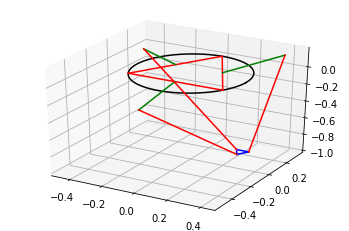

In [ ]:
#The vertices of the fixed-based equilateral triangle are:

Ratio = math.sqrt(pow(Sb,2)-pow(Sb/2,2)) - wb

alpha = np.linspace(0, 2 * np.pi, 201)
x_BaseCircle = Ratio*np.cos(alpha)
y_BaseCircle = Ratio*np.sin(alpha)

Bb1 = [Sb/2,-wb,0]
Bb2 = [0,ub,0]
Bb3 = [-Sb/2, -wb, 0]

x=cord.item(0)
y=cord.item(1)
z_neg=cord.item(2)

print(x)
print(y)
print(z_neg)

bt11 = np.linspace(Bb1[0],Bb2[0])
bt12 = np.linspace(Bb1[1],Bb2[1])
bt13 = np.linspace(Bb1[2],Bb2[2])

bt21 = np.linspace(Bb2[0],Bb3[0])
bt22 = np.linspace(Bb2[1],Bb3[1])
bt23 = np.linspace(Bb2[2],Bb3[2])

bt31 = np.linspace(Bb3[0],Bb1[0])
bt32 = np.linspace(Bb3[1],Bb1[1])
bt33 = np.linspace(Bb3[2],Bb1[2])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x_BaseCircle,y_BaseCircle,0,'black')

ax.plot3D(bt11, bt12, bt13,'red')
ax.plot3D(bt21, bt22, bt23,'red')
ax.plot3D(bt31, bt32, bt33,'red')

Pp1 = [0+x,-up+y,0+z_neg]
Pp2 = [Sp/2+x,wp+y,0+z_neg]
Pp3 = [-Sp/2+x,wp+y,0+z_neg]

pt11=np.linspace(Pp1[0],Pp2[0])
pt12=np.linspace(Pp1[1],Pp2[1])
pt13=np.linspace(Pp1[2],Pp2[2])

pt21=np.linspace(Pp2[0],Pp3[0])
pt22=np.linspace(Pp2[1],Pp3[1])
pt23=np.linspace(Pp2[2],Pp3[2])

pt31=np.linspace(Pp3[0],Pp1[0])
pt32=np.linspace(Pp3[1],Pp1[1])
pt33=np.linspace(Pp3[2],Pp1[2])

ax.plot3D(pt11, pt12, pt13,'blue')
ax.plot3D(pt21, pt22, pt23,'blue')
ax.plot3D(pt31, pt32, pt33,'blue')

###########################################################

BB1=[0,-wb,0]
BB2=[(math.sqrt(3)/2)*wb,1/2*wb,0]
BB3=[-(math.sqrt(3)/2)*wb,1/2*wb,0]

#Upper Legs L

Bt11=np.linspace(BB1[0],L1.item(0))
Bt12=np.linspace(BB1[1],L1.item(1))
Bt13=np.linspace(BB1[2],L1.item(2))

Bt21=np.linspace(BB2[0],L2.item(0))
Bt22=np.linspace(BB2[1],L2.item(1))
Bt23=np.linspace(BB2[2],L2.item(2))

Bt31=np.linspace(BB3[0],L3.item(0))
Bt32=np.linspace(BB3[1],L3.item(1))
Bt33=np.linspace(BB3[2],L3.item(2))


ax.plot3D(Bt11, Bt12, Bt13,'green')
ax.plot3D(Bt21, Bt22, Bt23,'green')
ax.plot3D(Bt31, Bt32, Bt33,'green')

###########################################################

#Lower Legs l
a=wb-up
b=Sp/2-(math.sqrt(3)/2)*wb
c=wp-0.5*wb

Bl1=[x , y+L*math.cos(theta1)+a , z_neg+L*math.sin(theta1)]
Bl2=[x-(math.sqrt(3)/2)*L*math.cos(theta2)+b,y-0.5*L*math.cos(theta2)+c,z_neg+L*math.sin(theta2)]
Bl3=[x+(math.sqrt(3)/2)*L*math.cos(theta3)-b,y-0.5*L*math.cos(theta3)+c,z_neg+L*math.sin(theta2)]


LP11=np.linspace(L1.item(0),Pp1[0])
LP12=np.linspace(L1.item(1),Pp1[1])
LP13=np.linspace(L1.item(2),Pp1[2])

LP21=np.linspace(L2.item(0),Pp2[0])
LP22=np.linspace(L2.item(1),Pp2[1])
LP23=np.linspace(L2.item(2),Pp2[2])

LP31=np.linspace(L3.item(0),Pp3[0])
LP32=np.linspace(L3.item(1),Pp3[1])
LP33=np.linspace(L3.item(2),Pp3[2])

ax.plot3D(LP11, LP12, LP13,'red')
ax.plot3D(LP21, LP22, LP23,'red')
ax.plot3D(LP31, LP32, LP33,'red')


# Reference


- R.L.  Williams  II,  “The  Delta  Parallel  Robot:  Kinematics  Solutions”,  Internet  Publication,  www.ohio.edu/people/williar4/html/pdf/DeltaKin.pdf, January 2016.

- ABB official site: https://new.abb.com/products/robotics/industrial-robots/irb-360/irb-360-data